In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

from itertools import product

In [2]:
df1 = pd.read_csv('city_day.csv')
df2 = pd.read_csv('city_hour.csv')
df3 = pd.read_csv('station_day.csv')
df4 = pd.read_csv('station_hour.csv')
df5 = pd.read_csv('stations.csv')

In [3]:
#printing the shape of each dataset 
print("Shape of the city_day :",df1.shape)
print("Shape of the city_hour :",df2.shape)
print("Shape of the station_day :",df3.shape)
print("Shape of the station_hour :",df4.shape)
print("Shape of the stations :",df5.shape)

Shape of the city_day : (29531, 16)
Shape of the city_hour : (707875, 16)
Shape of the station_day : (108035, 16)
Shape of the station_hour : (2589083, 16)
Shape of the stations : (230, 5)


In [4]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Index(['StationId', 'StationName', 'City', 'State', 'Status'], dtype='object')


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


Here both city_day & city_hour have same data and features but the difference is city_day is given in daily basis and city_hour is given hourly basis, So i will be using city_day dataset and i will be visualising and predicting my model

In [7]:
city_day=df1

<AxesSubplot:>

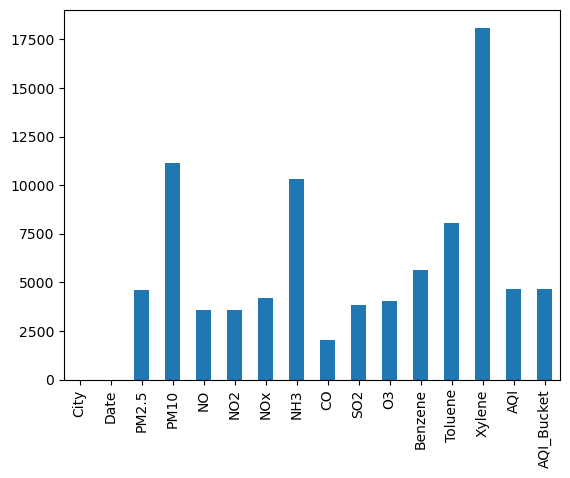

In [8]:
city_day.isna().sum().plot(kind ='bar')


In [9]:
for c in city_day.columns:
    null_values = city_day[c].isna().sum()
    percentage = (null_values / len(city_day)) * 100
    print("In {}, mean of null value is: {}".format(c, percentage))

In City, mean of null value is: 0.0
In Date, mean of null value is: 0.0
In PM2.5, mean of null value is: 15.570078900138837
In PM10, mean of null value is: 37.72307067149775
In NO, mean of null value is: 12.129626494192543
In NO2, mean of null value is: 12.139785310351833
In NOx, mean of null value is: 14.17154854220988
In NH3, mean of null value is: 34.97341776438319
In CO, mean of null value is: 6.9723341573262
In SO2, mean of null value is: 13.050692492634857
In O3, mean of null value is: 13.619586197555112
In Benzene, mean of null value is: 19.041007754563
In Toluene, mean of null value is: 27.229013578950934
In Xylene, mean of null value is: 61.32200060952897
In AQI, mean of null value is: 15.851139480545868
In AQI_Bucket, mean of null value is: 15.851139480545868


In [10]:
''' filling null values with mean of each column '''
for c in city_day.columns:
    if city_day[c].isna().sum() > 0:
        if city_day[c].dtype == 'float64':
            city_day[c] = city_day[c].fillna(city_day[c].mean())
        elif city_day[c].dtype == 'object':
            city_day[c] = city_day[c].fillna(city_day[c].value_counts().index[0])

<AxesSubplot:>

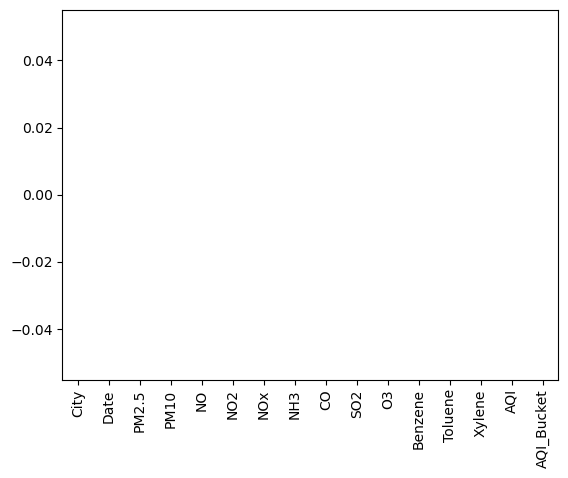

In [11]:
city_day.isna().sum().plot(kind ='bar')

In [12]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
print(list(city_day.columns))

['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [14]:
city_day['Date'] = pd.to_datetime(city_day['Date']).dt.date
city_day.drop(columns = ['Date'],axis=1, inplace=True)

In [15]:
city_day

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [16]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [17]:
# Detect outlier
# Outlier Detection using Tnter Quantile Range 
Q1=city_day.quantile(0.25)
Q3=city_day.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((city_day<(Q1-1.5*IQR))|(city_day>(Q3+1.5*IQR))).sum()

outlier counter of the all features


AQI           3192
AQI_Bucket       0
Benzene       1585
CO            2026
City             0
NH3           2807
NO            3196
NO2           1743
NOx           2629
O3            1181
PM10          3776
PM2.5         2736
SO2           2882
Toluene       2711
Xylene        6148
dtype: int64

In [44]:
## Outliers replace using Mean
for col in city_day.columns:
    if city_day[col].dtypes !='object':
        q1,q3=city_day[col].quantile(0.25),city_day[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        city_day[col] = np.where(city_day[col]>ul,city_day[col].mean(),np.where(city_day[col]<ll,city_day[col].mean(),city_day[col]))

In [45]:
# Detect outlier
# Outlier Detection using Tnter Quantile Range 
Q1=city_day.quantile(0.25)
Q3=city_day.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((city_day<(Q1-1.5*IQR))|(city_day>(Q3+1.5*IQR))).sum()

outlier counter of the all features


AQI              0
AQI_Bucket       0
Benzene          0
CO               0
City             0
NH3              0
NO               0
NO2              0
NOx              0
O3               0
PM10             0
PM2.5            0
SO2              0
Toluene          0
Xylene        5274
dtype: int64

In [46]:
city_day=city_day.drop(columns=['Xylene'],axis=1)

In [47]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,52.882470,113.454102,12.388832,22.741194,24.686008,19.220063,1.123040,10.654863,29.220236,2.005608,5.694935,131.882906
std,24.633069,6.283705,7.447480,11.408685,13.007959,8.513774,0.777519,5.372107,11.854204,1.759115,4.312269,53.050811
min,0.040000,96.290000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.280000,0.000000,0.000000,13.000000
25%,32.150000,109.385726,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.805000,0.240000,1.280000,88.000000
50%,55.990000,118.127103,11.530000,24.410000,26.010000,23.483476,0.950000,10.480000,31.273454,1.840000,6.930000,136.619917
75%,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,1.710000,14.531977,34.491430,3.280840,8.700972,166.463581
max,120.380000,131.210000,34.620000,51.930000,58.760000,40.640000,3.460000,27.190000,55.020000,7.840000,19.830000,284.000000


In [48]:
most_polluted = city_day[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,169.820193,116.785875,2.169341
Delhi,168.146260,115.251027,1.364691
Patna,158.892868,117.439314,1.545389
Gurugram,157.134003,116.368333,1.024242
Lucknow,152.860305,118.127103,1.517009
Jorapokhar,149.627762,113.509117,1.356474
Brajrajnagar,144.485295,112.341324,1.712509
Mumbai,142.723394,114.824295,0.586610
Talcher,142.531793,113.873741,1.862258


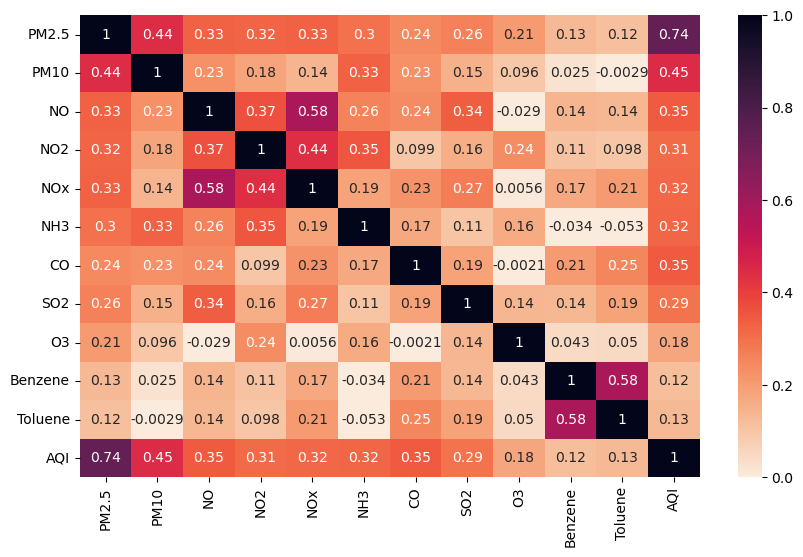

In [49]:
# make figure a bit bigger
plt.figure(figsize=(10,6))

# correlation heatmap
sns.heatmap(city_day.corr(), annot=True, vmin=0, vmax=1, cmap="rocket_r")
plt.show()

In [50]:
city_day=city_day.drop(columns=['NO','NO2','NOx'],axis=1)

In [51]:
city_day['AQI_Bucket'].value_counts()

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: AQI_Bucket, dtype: int64

In [52]:
city_day = city_day.replace({'AQI_Bucket':{'Satisfactory':0,'Good':1,'Moderate':2,'Poor':3,'Very Poor':4,'Severe':5}})

In [53]:
city_day.dtypes

City           object
PM2.5         float64
PM10          float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket      int64
dtype: object

In [54]:
city_day= pd.get_dummies(city_day, columns=['City'], drop_first=True)

In [55]:
city_day

,PM2.5,PM10,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,67.450578,118.127103,23.483476,0.920000,14.531977,34.49143,0.00000,0.020000,166.463581,2,...,0,0,0,0,0,0,0,0,0,0
1,67.450578,118.127103,23.483476,0.970000,24.550000,34.06000,3.68000,5.500000,166.463581,2,...,0,0,0,0,0,0,0,0,0,0
2,67.450578,118.127103,23.483476,2.248598,14.531977,30.70000,6.80000,16.400000,166.463581,2,...,0,0,0,0,0,0,0,0,0,0
3,67.450578,118.127103,23.483476,1.700000,18.590000,36.08000,4.43000,10.140000,166.463581,2,...,0,0,0,0,0,0,0,0,0,0
4,67.450578,118.127103,23.483476,2.248598,14.531977,39.31000,7.01000,18.890000,166.463581,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,104.609012,12.470000,0.470000,8.550000,23.30000,2.24000,12.070000,41.000000,1,...,0,0,0,0,0,0,0,0,0,1
29527,24.380000,109.385726,11.990000,0.520000,12.720000,30.14000,0.74000,2.210000,70.000000,0,...,0,0,0,0,0,0,0,0,0,1
29528,22.910000,109.385726,10.710000,0.480000,8.420000,30.96000,0.01000,0.010000,68.000000,0,...,0,0,0,0,0,0,0,0,0,1
29529,16.640000,104.609012,10.030000,0.520000,9.840000,28.30000,0.00000,0.000000,54.000000,0,...,0,0,0,0,0,0,0,0,0,1


### Split the data into Train, Test set

In [56]:
def train_test_split(Data, test_ratio):
    
    Data=Data.sample(frac=1,random_state=42)

    samples=int(len(Data)*(1-test_ratio))

    train_data=Data[:samples]
    test_data=Data[samples:]

    return train_data, test_data

In [57]:
train_data, test_data = train_test_split(city_day, 0.3)

In [58]:
X_train,Y_train=train_data.loc[:,train_data.columns != 'AQI'].values, train_data.loc[:,'AQI']
X_test,Y_test=test_data.loc[:,test_data.columns != 'AQI'].values, test_data.loc[:,'AQI']

In [59]:
X_train.shape

(20671, 34)

In [60]:
Y_train.shape

(20671,)

In [61]:
X_test.shape

(8860, 34)

In [62]:
Y_test.shape

(8860,)

In [63]:
# create a regressor object
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [64]:
pred = regressor.predict(X_test)
pred

array([166.46358149, 161.        , 156.        , ..., 166.36494957,
       103.        , 135.        ])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
mean_squared_error(Y_test,pred)

663.9000518581221

In [67]:
r2_score(Y_test, pred)

0.7639813711253582

In [68]:
Y_train_pred = regressor.predict(X_train)
r2_score(Y_train, Y_train_pred)

0.999733858453505

In [69]:
from sklearn import  metrics
print('MAE',metrics.mean_absolute_error(Y_test,pred))
print('MSE',metrics.mean_squared_error(Y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE 14.592169298221286
MSE 663.9000518581221
RMSE 25.766258010392626


## Comparison between Actual and Predicted

In [70]:

df1= pd.DataFrame({'Actual': np.round(Y_test), 
                   'Predicted': np.round(pred),
                 })
df1['difference']=df1.apply(lambda x: x.Predicted-x.Actual,axis=1)
df1.head(10)

,Actual,Predicted,difference
14621,166.0,166.0,0.0
15332,151.0,161.0,10.0
7329,118.0,156.0,38.0
10200,52.0,64.0,12.0
19838,52.0,56.0,4.0
3895,123.0,121.0,-2.0
29435,90.0,72.0,-18.0
22622,166.0,166.0,0.0
28369,166.0,166.0,0.0
20747,166.0,166.0,0.0


# Hyper Parameter tuning

In [71]:
# Hyper parameters range intialization for tuning 

parameters={'max_depth': [None, 1, 2, 3, 4,9,10,25,100], 
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}

In [72]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [73]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)

In [74]:
tuning_model.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 9, 10, 25, 100],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [75]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [76]:
# best model score
tuning_model.best_score_

-406.77483559094406

# Training Decision Tree With Best Hyperparameter

In [77]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=4, min_samples_leaf=1, min_samples_split=2)

In [78]:
# fitting model


tuned_hyper_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

In [79]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

In [80]:
# with hyperparameter tuning 
print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred)))

MAE: 13.594616946115673
MSE: 407.5019595675132
RMSE: 20.186677774401442


In [81]:
# without Hyper parameter tuning
print('MAE',metrics.mean_absolute_error(Y_test,pred))
print('MSE',metrics.mean_squared_error(Y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE 14.592169298221286
MSE 663.9000518581221
RMSE 25.766258010392626


In [82]:
r2_score(Y_test, pred)

0.7639813711253582

In [83]:
r2_score(Y_test, tuned_pred)

0.8551317272958915

# ID3 algorithm from scratch

In [84]:
import math 
import operator


eps = np.finfo(float).eps

def rmse_score(y_true, y_pred):

    """ rmse score = sqrt((sum[i=0 to n](y_true - y_pred)) / len(y_true)) """

    return np.sqrt((np.subtract(y_pred, y_true) ** 2).sum()/len(y_true))

def train_test_split(x, y, test_size = 0.25, random_state = None):

    """ partioning the data into train and test sets """

    x_test = x.sample(frac = test_size, random_state = random_state)
    y_test = y[x_test.index]

    x_train = x.drop(x_test.index)
    y_train = y.drop(y_test.index)

    return x_train, x_test, y_train, y_test




class ID3DecisionTreeRegressor: #class is used to create user-defined structure

    def __init__(self, max_depth = None, min_sample_leaf = 3):

        self.depth = 0 #Depth of the tree
        self.max_depth = max_depth	#Maximum depth of the tree
        self.min_sample_leaf = min_sample_leaf	#Minimum number of samples for each node
        self.coefficient_of_variation = 10 	#Stopping Criterion

        self.features = list
        self.X_train = np.array
        self.y_train = np.array
        self.num_feats = int 
        self.train_size = int 

    def fit(self, X, y):

        self.X_train = X 
        self.y_train = y
        self.features = list(X.columns)
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        df = X.copy()
        df['target'] = y.copy()

        #Builds Decision Tree
        self.tree = self._build_tree(df)

        print("\nDecision Tree(depth = {}) : \n {}".format(self.depth, self.tree))

    def _build_tree(self, df, tree = None):

        """
            Args:
                df: current number of rows available for splitting(decision making)
        """

        #Get feature with minimum score
        feature, cutoff = self._find_best_split(df)

        if cutoff is None:
            return tree

        #Initialization of tree
        if tree is None:
            tree = {}
            tree[feature] = {}

        #Left Child
        new_df = self._split_rows(df, feature, cutoff, operator.le)

        target_coef_of_var = self._coef_ov(new_df['target'])

        self.depth += 1

        if(target_coef_of_var < self.coefficient_of_variation or len(new_df) <= self.min_sample_leaf): #pure group
            tree[feature]['<=' + str(cutoff)] = new_df['target'].mean()
        else:
            if self.max_depth is not None and self.depth >= self.max_depth:
                tree[feature]['<=' + str(cutoff)] = new_df['target'].mean()
            else:
                tree[feature]['<=' + str(cutoff)] = self._build_tree(new_df)


        #Right Child
        new_df = self._split_rows(df, feature, cutoff, operator.gt)

        target_coef_of_var = self._coef_ov(new_df['target'])

        if(target_coef_of_var < self.coefficient_of_variation or len(new_df) <= self.min_sample_leaf): #pure group
            tree[feature]['>' + str(cutoff)] = new_df['target'].mean()
        else:
            if self.max_depth is not None and self.depth >= self.max_depth:
                tree[feature]['>' + str(cutoff)] = new_df['target'].mean()
            else:
                tree[feature]['>' + str(cutoff)] = self._build_tree(new_df)

        return tree

    def _coef_ov(self, y):

        """ calculates coefficient of variation:
            COV = (Mean of y / Standard Deviation of y) * 100
        """
        if(y.std() == 0):
            return 0
        coef_of_var = (y.mean()/y.std()) * 100

        return coef_of_var

    def _split_rows(self, df, feature, feat_val, operation ):

        """ split rows based on given criterion """

        return df[operation(df[feature], feat_val)].reset_index(drop = True)

    def _find_best_split(self, df):

        """
            Finds the column to split on first.
        """

        best_feature = str
        cutoff = None
        best_score = float('inf')


        for feature in list(df.columns[:-1]):

            score, threshold = self._find_feature_split(feature, df)

            if score < best_score:
                best_feature = feature
                best_score = score
                cutoff = threshold
        
        return best_feature, cutoff 

    def _find_feature_split(self, feature, df):

        best_score = float('inf')
        cutoff = float

        for val in df[feature]:
            left_child = df[feature][df[feature] <= val] 
            right_child = df[feature][df[feature] > val]

            if(len(left_child) > 0 and len(right_child) > 0):
                score = self._find_score(df, left_child, right_child)

                if score < best_score:
                    best_score = score
                    cutoff = val

        return best_score, cutoff


    def _find_score(self, df, lhs, rhs):

        y = df['target']

        lhs_std = y.iloc[lhs.index].std()
        rhs_std = y.iloc[rhs.index].std()

        if(np.isnan(lhs_std)):
            lhs_std = 0
        if(np.isnan(rhs_std)):
            rhs_std = 0

        return lhs_std * lhs.sum() + rhs_std * rhs.sum()

    def _predict_target(self, feature_lookup, x, tree):

        for node in tree.keys():
            val = x[node]
            if type(val) == str:
                tree = tree[node][val]
            else:
                cutoff = str(list(tree[node].keys())[0]).split('<=')[1]

                if(val <= float(cutoff)):   #Left Child
                    tree = tree[node]['<='+cutoff]
                else:                       #Right Child
                    tree = tree[node]['>'+cutoff]

            prediction = str

            if type(tree) is dict:
                prediction = self._predict_target(feature_lookup, x, tree)
            else:
                predicton = tree 
                return predicton

        return prediction   


    def predict(self, X):

        results= []
        feature_lookup = {key: i for i, key in enumerate(list(X.columns))}

        for index in range(len(X)):

            results.append(self._predict_target(feature_lookup, X.iloc[index], self.tree))

        return np.array(results)
    

In [85]:
if __name__ == '__main__':


    #Split Features and target
    X, y = city_day.drop([city_day.columns[0], city_day.columns[-1]], axis = 1), city_day[city_day.columns[-1]]

    #Split data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    dt_reg = ID3DecisionTreeRegressor(max_depth=3)
    dt_reg.fit(X, y)
    
    #print("\nTrain RMSE : {}".format(rmse_score(y_train, dt_reg.predict(X_train))))
    #print("\nTest RMSE: {}".format(rmse_score(y_test, dt_reg.predict(X_test))))


Decision Tree(depth = 3) : 
 {'City_Aizawl': {'<=0': {'City_Amaravati': {'<=0': {'City_Amritsar': {'<=0': 0.053659252734346324, '>0': 0.0}}, '>0': 0.0}}, '>0': 0.0}}


In [87]:
print("\nTest RMSE: {}".format(rmse_score(y_test, dt_reg.predict(X_test))))


Test RMSE: 0.21660929436040735


In [88]:
print("\nTrain RMSE : {}".format(rmse_score(y_train, dt_reg.predict(X_train))))


Train RMSE : 0.21639739818043002
